# Import Lib

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
plt.style.use('fivethirtyeight')

# ETL Data

In [2]:
df_auto_data = pd.read_csv('Data/Auto.csv')
display(df_auto_data.head())
print('No of rows ', df_auto_data.shape[0])
display(df_auto_data.info())
df_auto_data['horsepower'] = pd.to_numeric(df_auto_data.horsepower,errors='coerce')
display(df_auto_data.info())
display(df_auto_data.isna().any())

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


No of rows  397
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


None

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

## Drop Na's

In [3]:
df_auto_data_work = df_auto_data.dropna().copy()
display(df_auto_data_work.isna().any())

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

## Validation Set Approach

In [4]:
df_auto_data_work.head(n=2)
columns_to_select = ['mpg','horsepower']
df_model_to_work = df_auto_data_work.loc[:,columns_to_select].copy()

train,test = train_test_split(df_model_to_work,train_size= 192,random_state=1,shuffle = True)

In [5]:
y_train = train.mpg
X_train = train.horsepower
y_test = test.mpg
X_test = test.horsepower
linear_model = LinearRegression()
linear_model.fit(X_train.values.reshape(-1,1),y_train)
y_test_pred = linear_model.predict(X_test.values.reshape(-1,1))
mean_squared_error(y_test,y_test_pred)

24.461525784213922

In [91]:
dict_results = {}
for _i in range(1,11):
    train,test = train_test_split(df_model_to_work,train_size= 192,random_state=_i,shuffle = True)
    y_train = train.mpg
    X_train = train.horsepower
    y_test = test.mpg
    X_test = test.horsepower
    _list_mse = []
    for _deg in range(1,11):
        linear_model = LinearRegression()
        poly_features = PolynomialFeatures(_deg,include_bias=False)
        linear_model.fit(poly_features.fit_transform(X_train.values.reshape(-1,1)),y_train)
        y_test_pred = linear_model.predict(poly_features.fit_transform(X_test.values.reshape(-1,1)))
        _list_mse.append(mean_squared_error(y_test,y_test_pred))
    dict_results['seed'+ str(_i)] = _list_mse
        
        
    

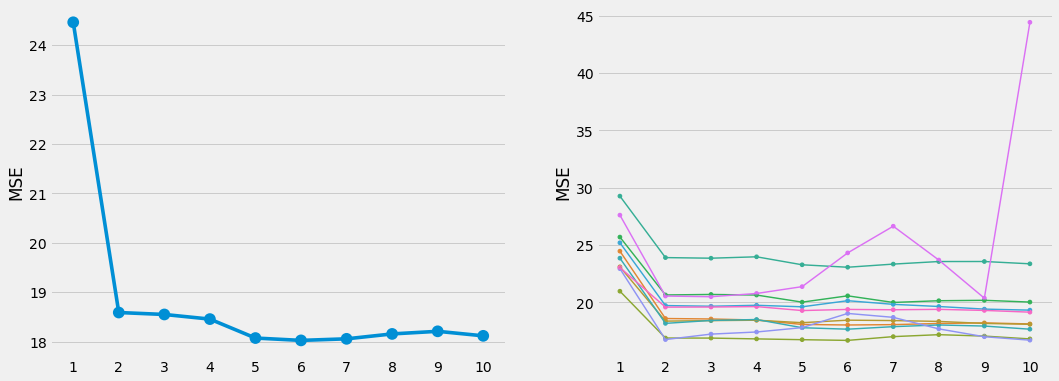

In [104]:
df_results = pd.DataFrame(dict_results,index= range(1,11))
fig,axs = plt.subplots(1,2,figsize = (16,6))
sns.pointplot(y=df_results.seed1, x= df_results.index,ax = axs[0],scale= 0.5)
axs[0].set_ylabel('MSE')
for i in range(1,11):
    sns.pointplot(y=df_results['seed' + str(i)], x= df_results.index,ax = axs[1],scale= 0.2,color = sns.color_palette("husl", 11)[i])
axs[1].set_ylabel('MSE')  

plt.show()

## LOOCV

In [78]:
list_loocv = []
for _deg in range(1,11):
    loocv = LeaveOneOut()
    _mse = []
    for train_index,test_index in loocv.split(df_model_to_work):
        poly_features = PolynomialFeatures(_deg,include_bias=False)
        train = df_model_to_work.iloc[train_index]
        y_train = train.mpg
        X_train = train.horsepower
        test = df_model_to_work.iloc[test_index]
        y_test = test.mpg
        X_test = test.horsepower
        linear_model = LinearRegression()
        linear_model.fit(poly_features.fit_transform(X_train.values.reshape(-1,1)),y_train)
        y_pred_test = linear_model.predict(poly_features.fit_transform(X_test.values.reshape(-1,1)))
        _mse.append(mean_squared_error(y_test,y_pred_test))
    print('Done for degree',_deg)
    list_loocv.append(np.mean(_mse))

Done for degree 1
Done for degree 2
Done for degree 3
Done for degree 4
Done for degree 5
Done for degree 6
Done for degree 7
Done for degree 8
Done for degree 9
Done for degree 10


In [83]:
np.array(list_loocv)

array([24.23151352, 19.24821312, 19.33498406, 19.42443031, 19.0332128 ,
       18.97917014, 19.13064037, 19.22446754, 19.13393595, 18.94627709])

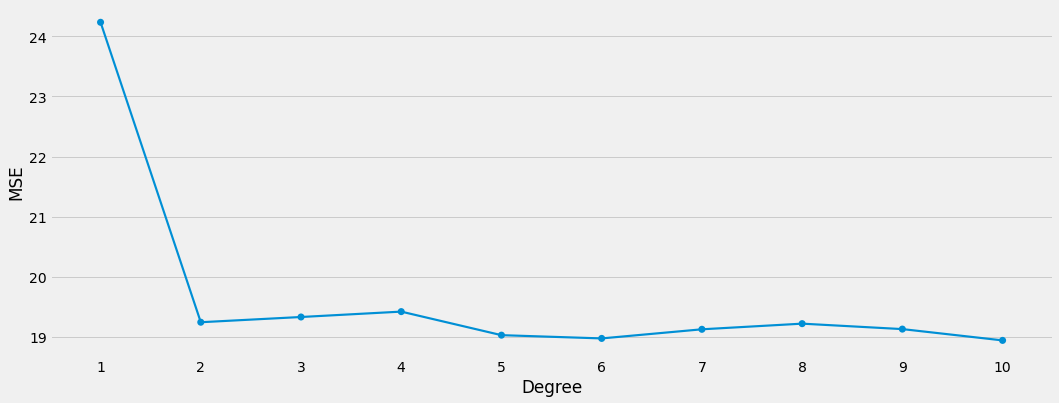

In [88]:
fig,axs = plt.subplots(1,1, figsize = (16,6))
sns.pointplot(y=np.array(list_loocv), x = list(range(1, 11)), ax= axs,scale=0.3)
axs.set_xlabel('Degree')
axs.set_ylabel('MSE')
plt.show()

## KFold

In [132]:
dict_k_fold = {}

for _seed in range(1,11):
    list_kfold = []
    for _deg in range(1,11):
        kfold = KFold(n_splits=10,shuffle=True,random_state=1)
        _mse = []
        for train_index,test_index in kfold.split(df_model_to_work):
            poly_features = PolynomialFeatures(_deg,include_bias=False)
            train = df_model_to_work.iloc[train_index]
            y_train = train.mpg
            X_train = train.horsepower
            test = df_model_to_work.iloc[test_index]
            y_test = test.mpg
            X_test = test.horsepower
            linear_model = LinearRegression()
            linear_model.fit(poly_features.fit_transform(X_train.values.reshape(-1,1)),y_train)
            y_pred_test = linear_model.predict(poly_features.fit_transform(X_test.values.reshape(-1,1)))
            _mse.append(mean_squared_error(y_test,y_pred_test))
        #print('Done for degree',_deg)
        list_kfold.append(np.mean(_mse))
    dict_k_fold['seed'+ str(_seed)] = list_kfold


In [ ]:
list_kfold

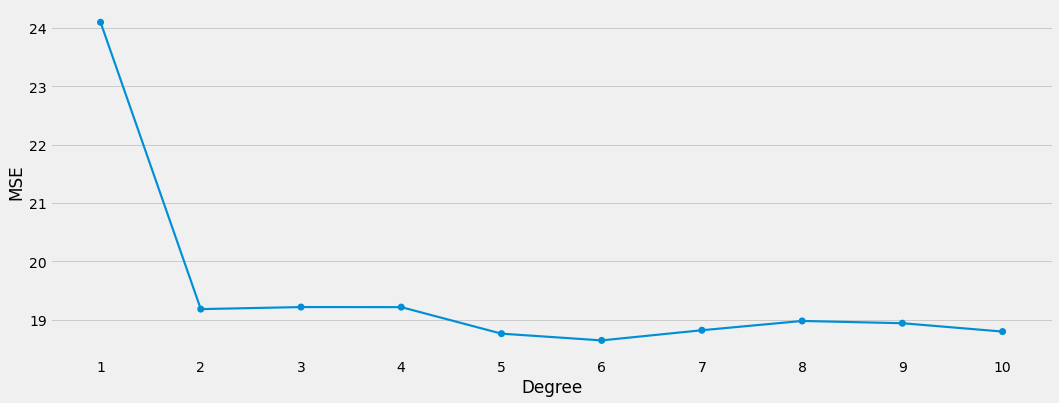

In [119]:
fig,axs = plt.subplots(1,1, figsize = (16,6))
sns.pointplot(y=np.array(list_kfold), x = list(range(1, 11)), ax= axs,scale=0.3)
axs.set_xlabel('Degree')
axs.set_ylabel('MSE')
plt.show()

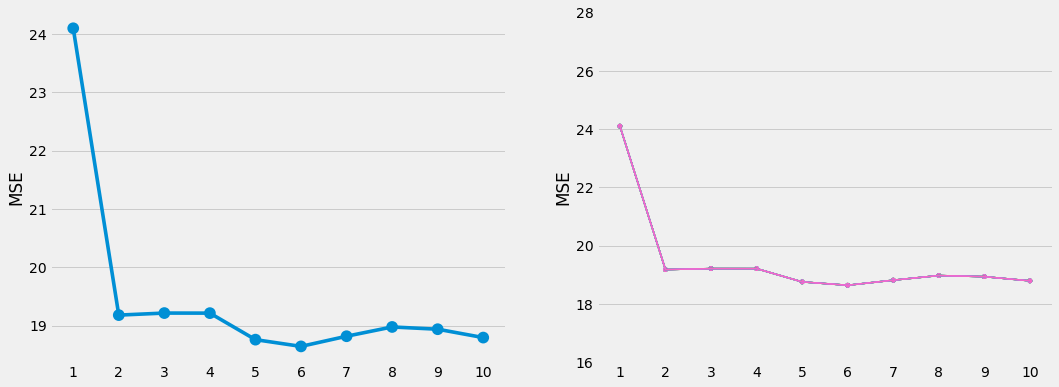

In [135]:
df_results = pd.DataFrame(dict_k_fold,index= range(1,11))
fig,axs = plt.subplots(1,2,figsize = (16,6))
sns.pointplot(y=df_results.seed1, x= df_results.index,ax = axs[0],scale= 0.5)
axs[0].set_ylabel('MSE')
for i in range(1,11):
    sns.pointplot(y=df_results['seed' + str(i)], x= df_results.index,ax = axs[1],scale= 0.2,color = sns.color_palette("husl", 11)[i])
axs[1].set_ylabel('MSE')  
axs[1].set_ylim(16,28)
plt.show()


In [136]:
df_results

,seed1,seed2,seed3,seed4,seed5,seed6,seed7,seed8,seed9,seed10
1,24.097676,24.097676,24.097676,24.097676,24.097676,24.097676,24.097676,24.097676,24.097676,24.097676
2,19.178890,19.178890,19.178890,19.178890,19.178890,19.178890,19.178890,19.178890,19.178890,19.178890
3,19.213860,19.213860,19.213860,19.213860,19.213860,19.213860,19.213860,19.213860,19.213860,19.213860
4,19.212807,19.212807,19.212807,19.212807,19.212807,19.212807,19.212807,19.212807,19.212807,19.212807
5,18.757992,18.757992,18.757992,18.757992,18.757992,18.757992,18.757992,18.757992,18.757992,18.757992
6,18.642293,18.642293,18.642293,18.642293,18.642293,18.642293,18.642293,18.642293,18.642293,18.642293
7,18.816494,18.816494,18.816494,18.816494,18.816494,18.816494,18.816494,18.816494,18.816494,18.816494
8,18.975665,18.975665,18.975665,18.975665,18.975665,18.975665,18.975665,18.975665,18.975665,18.975665
9,18.936959,18.936959,18.936959,18.936959,18.936959,18.936959,18.936959,18.936959,18.936959,18.936959
10,18.793515,18.793515,18.793515,18.793515,18.793515,18.793515,18.793515,18.793515,18.793515,18.793515
